In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('uber.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80416 entries, 0 to 80415
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         80416 non-null  int64  
 1   key                80416 non-null  object 
 2   fare_amount        80416 non-null  float64
 3   pickup_datetime    80416 non-null  object 
 4   pickup_longitude   80416 non-null  float64
 5   pickup_latitude    80416 non-null  float64
 6   dropoff_longitude  80416 non-null  float64
 7   dropoff_latitude   80415 non-null  float64
 8   passenger_count    80415 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.5+ MB


In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8.041600e+04,80416.000000,80416.000000,80416.000000,80416.000000,80415.000000,80415.000000
mean,2.769164e+07,11.381542,-72.533096,39.945845,-72.567713,39.934459,1.674874
std,1.601885e+07,9.924870,11.857315,8.557173,15.738776,6.803074,1.295577
min,4.800000e+01,-5.000000,-1340.648410,-74.015515,-3356.666300,-74.009465,0.000000
25%,1.380297e+07,6.000000,-73.992020,40.734812,-73.991417,40.733664,1.000000
50%,2.767201e+07,8.500000,-73.981775,40.752595,-73.980082,40.752982,1.000000
75%,4.150601e+07,12.500000,-73.967171,40.767118,-73.963773,40.768112,2.000000
max,5.542169e+07,350.000000,40.808425,1644.421482,40.828672,872.697628,6.000000


In [ ]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [ ]:
df= df.assign(
    second = df.pickup_datetime.dt.second,
    minute = df.pickup_datetime.dt.minute,
    hour = df.pickup_datetime.dt.hour,
    day= df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)
df = df.drop('pickup_datetime',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80415 entries, 0 to 80414
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        80415 non-null  float64
 1   pickup_longitude   80415 non-null  float64
 2   pickup_latitude    80415 non-null  float64
 3   dropoff_longitude  80415 non-null  float64
 4   dropoff_latitude   80415 non-null  float64
 5   passenger_count    80415 non-null  float64
 6   second             80415 non-null  int64  
 7   minute             80415 non-null  int64  
 8   hour               80415 non-null  int64  
 9   day                80415 non-null  int64  
 10  month              80415 non-null  int64  
 11  year               80415 non-null  int64  
 12  dayofweek          80415 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 8.6 MB


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3


In [ ]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    # long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
    # c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin

    return c

In [ ]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3,4.475450


Text(0, 0.5, 'fare_amount')

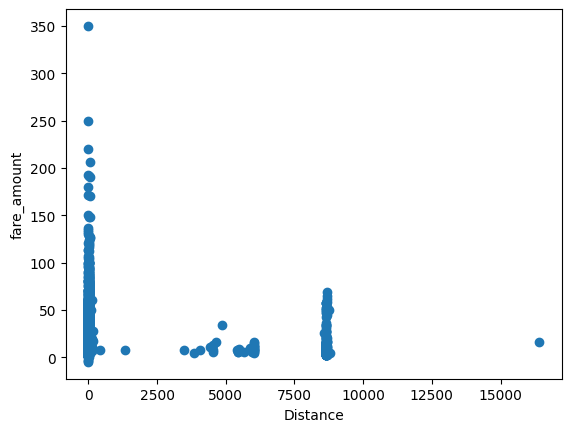

In [ ]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

Text(0, 0.5, 'fare_amount')

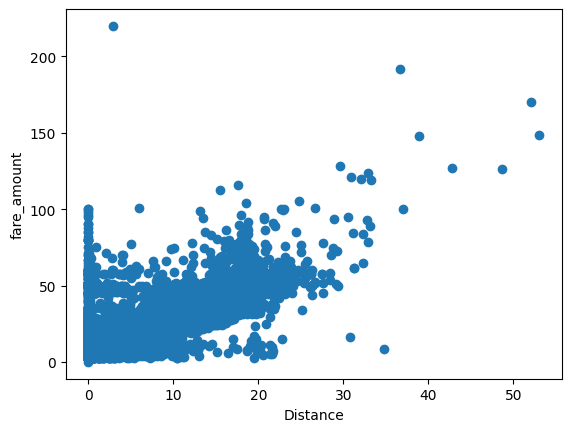

In [ ]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.39937201]
 [-0.37857268]
 [ 0.16220994]
 ...
 [-0.1289807 ]
 [-0.03538371]
 [-0.04578337]]
[[-0.43792629]
 [-0.22283374]
 [ 0.49355716]
 ...
 [-0.13638697]
 [ 0.2129218 ]
 [-0.17317551]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.7234652


In [ ]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
10680,-0.794559,-0.600243
5931,-0.503369,-0.192464
6436,-0.170579,0.056099
2958,-0.243377,-0.104004
5084,0.900586,0.418121
206,1.919753,1.052288
5216,-0.836158,-0.702582
3350,0.079013,-0.007274
6929,1.118979,1.620722
8317,-0.711362,-0.703881


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.26784382842095134
Mean Absolute % Error: 1.5432076499488827
Mean Squared Error: 0.27885619024291897
Root Mean Squared Error: 0.5280683575475044
R Squared (R²): 0.8505675945403404


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

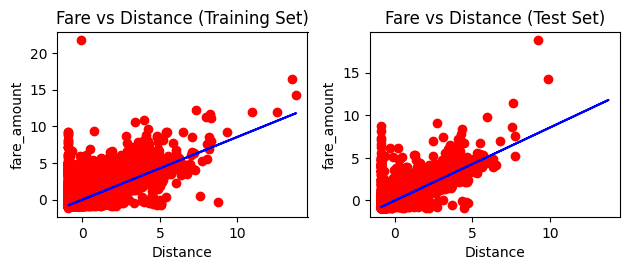

In [ ]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")

plt.tight_layout()
plt.show()

In [ ]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_metrics = pd.DataFrame([[
     "Linear Regresion model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
     np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, linreg_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.528068,0.850568


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

<ipython-input-32-23bf85fdec00>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [ ]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
1633,-0.295375,-0.087630
4917,-0.045783,-0.070398
11526,-0.336974,-0.315376
10705,-0.815359,-0.692573
6284,-0.555367,-0.613403
13,0.203809,0.441901
11963,-0.794559,0.670044
4412,-0.253777,-0.174892
10591,-0.336974,0.187007
7088,1.035782,1.948109


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.304640001368835
Mean Absolute % Error: 1.6847468404005774
Mean Squared Error: 0.33006510329962757
Root Mean Squared Error: 0.5745129270082855
R Squared (R²): 0.8201723135958382


In [ ]:
# compile the required information
random_forest_metrics = pd.DataFrame([[
     "Random Forest Regressor model",
     np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
     np.sqrt(metrics.r2_score(y_test, y_pred_RF))
]], columns = cols)

result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index=True)

result_tabulation

,Model,RMSE,R-Squared
0,Linear Regresion model,0.528068,0.850568
1,Random Forest Regressor model,0.498608,0.868021


In [ ]:
# Adjust hyperparameters for the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=10)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the Random Forest model
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
rf_r_squared = np.sqrt(metrics.r2_score(y_test, y_pred_rf))

# Print Random Forest model results
print("\nRandom Forest Model Results:")
print("RMSE:", rf_rmse)
print("R-Squared:", rf_r_squared)

<ipython-input-54-e69c35b96dc4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)



Random Forest Model Results:
RMSE: 0.4986079451554284
R-Squared: 0.8680205905239243


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics for Ridge Regression
# Instantiate and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict with the Linear Regression model
y_pred_linear = linear_reg.predict(X_test)

# Calculate metrics for Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred_linear)

# Compare the Linear Regression model
print("Linear Regression Metrics:")
print("MSE:", linear_mse)
print("RMSE:", linear_rmse)
print("R-squared (R2):", linear_r2)


# Calculate metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)



print("\nRandom Forest Regression Metrics:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R-squared (R2):", rf_r2)


Linear Regression Metrics:
MSE: 0.27885619024291897
RMSE: 0.5280683575475044
R-squared (R2): 0.7234652328821408

Random Forest Regression Metrics:
MSE: 0.24860988297211867
RMSE: 0.4986079451554284
R-squared (R2): 0.7534597455735024
